# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [ ]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **yelp review including three kinds of ids, how many people found a certain review useful, funny, or cool, a text comment, a date, and a star rating out of 5**.
1. There are **208166** rows in the dataset
    1. There are **9** columns in the dataset excluding the index.
1. The first review is written on **2007-01-02**.
    1. The last review is written on **2019-12-13**.

In [ ]:
# import any necessary libraries here
import pandas as pd
import os
import matplotlib.pyplot as plt



In [ ]:
# First, list the folder containing your data
# fpath = 'path/to/your/data'
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets
fpath = 'drive/MyDrive/Colab Notebooks/Data Analytics I/Datasets/Assignment 3/'
os.listdir(fpath)



['quebec_biz.csv', 'quebec_yelp_reviews.csv']

In [ ]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
# df = pd.read_csv(fpath + 'review_dataset_filename.csv', index_col = 0)
# you can call the dataframe something other than df
reviews_df = pd.read_csv(fpath + 'quebec_yelp_reviews.csv', index_col = 0)


In [ ]:
# preview the dataframe's first 5 rows using the .head() method
# what unit of observation does each row represent?
reviews_df.head()



,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [ ]:
reviews_df['useful'].max()

168

In [ ]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
reviews_df.shape


(208166, 9)

In [ ]:
# take a look at the column names by accessing the dataframe's column attribute, 
# e.g. df.columns.values (but replace df with the name you picked)
reviews_df.columns.values




array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [ ]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [ ]:
reviews_df.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [ ]:
# find the smallest date (use the .min method)

reviews_df['date'].min()


Timestamp('2007-01-02 00:00:00')

In [ ]:
# find the largest date (use the .max method)

reviews_df['date'].max()



Timestamp('2019-12-13 00:00:00')

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [ ]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'
date_lower_bound = pd.to_datetime('2016/5/1')
date_upper_bound = pd.to_datetime('2019/6/1')

filtered_reviews_df = reviews_df.loc[ (reviews_df['date'] >= date_lower_bound) & (reviews_df['date'] < date_upper_bound) ]
filtered_reviews_df.head()



,review_id,user_id,business_id,useful,funny,cool,text,date,stars
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
7,Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,4
10,uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,5
11,Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,4
13,bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,tOhRQqiupLyJdBJVQMGOEQ,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,4


In [ ]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date

filtered_reviews_df['date'].min()



Timestamp('2016-05-01 00:00:00')

In [ ]:
# max date

filtered_reviews_df['date'].max()



Timestamp('2019-05-31 00:00:00')

In [ ]:
# save the dataset somewhere, give it a meaningful file name
filtered_reviews_df.to_csv(fpath + 'filtered_yelp_reviews_2016-5-1_to_2019-5-31.csv')



# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)

1. Trend:
  - Reviews tend to spike around September - October before dipping during January - February
1. Explanations: 
  - The high period tends is fall, which people are usually excited for: halloween, pumpkin spice latte, etc. While people tend to get bogged down by winter (the low period)
  - Maybe people percieve services as more expensive right after Christmas and when people think they are overpaying, they tend to give worse reviews. On the other hand, they might have more savings just before Christmas so they don't care as much for the price but rather for the experience

In [ ]:
# create 'ym' column
filtered_reviews_df['ym'] = filtered_reviews_df['date'].dt.to_period('M')

filtered_reviews_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_id,user_id,business_id,useful,funny,cool,text,date,stars,ym
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016-07
7,Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,4,2016-09
10,uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,5,2018-09
11,Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,4,2017-05
13,bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,tOhRQqiupLyJdBJVQMGOEQ,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,4,2017-06


In [ ]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method


filtered_reviews_df['ym'].unique()


<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

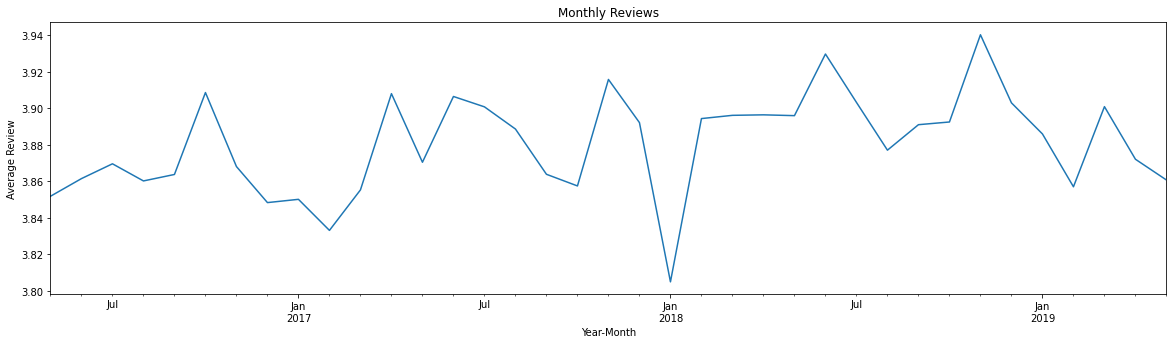

In [ ]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples

# making the plot easier to read
plt.rcParams["figure.figsize"] = (20,5)

# instruction say use star columns, however it would make more sense to plot usefulness
filtered_reviews_df.groupby('ym')['stars'].mean().plot()
plt.title('Monthly Reviews')
plt.xlabel('Year-Month')
plt.ylabel('Average Review')
plt.show()



# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **business including id, name, address and location, stars, amount of reviews, if it's open, and some business tags**
1. We should merge on **business_id**

### Part B

1. Open businesses tend to have higher stars than shut down businesses. Also, open businesses tend to have more consistent results, while shut down businesses' stars vary wildly from month to month.
1. 2 possible reasons are:
    1. Shut down businesses could have lower stars because people may be giving shut down businesses 0-star reviews out of frustration since they can't recieve the business' service.
    1. An explanation of shut down business star inconsistency may be that business with inconsistency results tend to shut down because inconsistent results drive inconsistent sales which are difficult to plan around.

In [ ]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)

quebec_biz_df = pd.read_csv(fpath + 'quebec_biz.csv', index_col=0)


In [ ]:
# Take a look at the first few rows to determine the observational unit

quebec_biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# merge the 2 datasets
merged_quebec_reviews_df = filtered_reviews_df.merge(quebec_biz_df, how='left', on='business_id')



In [ ]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets

# using sets to be 100% sure
# if the symmetric difference between the merged df's rows and the resulting one is an empty set, then they are equal
m_rows = set(merged_quebec_reviews_df.columns.unique())
f_rows = set(filtered_reviews_df.columns.unique())
b_rows = set(quebec_biz_df.columns.unique())

expected_rows = f_rows.union(b_rows)

print(expected_rows.symmetric_difference(m_rows))
print(merged_quebec_reviews_df.columns.unique())

# empty set -> expected result




set()
Index(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars', 'ym', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'biz_stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')


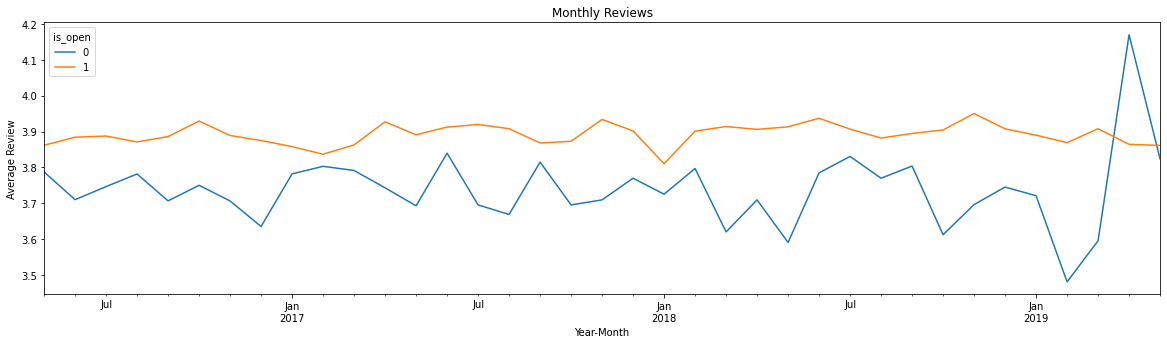

In [ ]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes

# making the plot easier to read
plt.rcParams["figure.figsize"] = (20,5)

merged_quebec_reviews_df.groupby(['ym', 'is_open'])['stars'].mean().unstack('is_open').plot()
plt.title('Monthly Reviews')
plt.xlabel('Year-Month')
plt.ylabel('Average Review')
plt.show()


